### DO NOT RUN ANY CELLS ABOVE THE FOLLOWING SECTION:  Pickle the above pd.DataFrame

# Import Relevant Libraries

In [59]:
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import datetime
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from math import pi

from nintendo.trend_radar_functions import json_to_df

#from nintendo.____ import ____

# Load Tweet Data

In [62]:
tweets = []
for line in open('NintendoTweets.json', 'r'):
    if len(line)>1:
        tweets.append(json.loads(line))
#tweets

KeyboardInterrupt: 

In [ ]:
len(tweets)

# Data Cleaning

 #### Flatten JSON File for embedded dictionaries

In [ ]:
#json_t

In [ ]:
tweets_norm = json_normalize(tweets)

#### Condense dataframe to the relevant columns

In [ ]:
df = tweets_norm[['user.id', 'text', 'lang', 'created_at', 'timestamp_ms']]
df.head()

#### Filter for English only

In [ ]:
df = df.loc[df['lang'] == 'en']
print(len(df))
df.head()

#### Create time column

In [ ]:
# THIS IS NOT YET USED
# datetime.datetime.fromtimestamp(int('1528819224616')/1000)
# df['created_at'][0]

In [ ]:
df['time'] = df['created_at'].apply(lambda x: str(x)[11:19])
print(len(df))
df.head()

#df['Seattle Zip'] = df['Test'].apply(lambda x: 0 if x == 0 else 1)

#### Explore the data

In [ ]:
df.info()

In [ ]:
df.isna().sum()

#### Min and max time stamps

In [ ]:
print(df['time'].min())
print(df['time'].max())

#### Dropping duplicate rows

In [ ]:
df = df.drop_duplicates(subset=None, keep='first')
print(len(df))
df.head()

#### Remove hashtag words from text column

In [ ]:
hashtags = []
for text in df['text']:
    words = text.split(' ')
    for i in words:
        if i.startswith('#'):
            hashtags.append(i)
        else:
            pass

In [ ]:
unique_hashtags = set(hashtags)
len(unique_hashtags)

#### Remove links  from text column

In [ ]:
links = []
for text in df['text']:
    words = text.split(' ')
    for i in words:
        if i.startswith('http'):
            links.append(i)
        else:
            pass

In [ ]:
unique_links = set(links)
len(unique_links)

#### Remove @s from text column

In [ ]:
ats = []
for text in df['text']:
    words = text.split(' ')
    for i in words:
        if i.startswith('@'):
            ats.append(i)
        else:
            pass

In [ ]:
unique_ats = set(ats)
len(unique_ats)

#### All words to remove: hashtags, links, and @s

In [ ]:
unique_hashtags = list(unique_hashtags)
unique_links = list(unique_links)
unique_ats = list(unique_ats)

words_to_remove_lists = [unique_hashtags] + [unique_links] + [unique_ats]

words_to_remove = []
for sublist in words_to_remove_lists:
    for i in sublist:
        words_to_remove.append(i)

#### Create a final list of tweets to use for NLP 
* Removes: hashtags, @s, and http

In [ ]:
texts_final = []
for tweet in df['text']:
    words = tweet.split()
    resultwords = [i for i in words if i not in words_to_remove]
    result = ' '.join(resultwords)
    texts_final.append(result)
texts_final

#### Pickled list due to long run time:

In [ ]:
# import pickle

# with open('cleaned_tweets.pkl', 'wb') as f:
#     pickle.dump(text_no_hashtags, f)

In [ ]:
# import pickle

# with open('cleaned_tweets.pkl', 'rb') as f:
#     texts_final = pickle.load(f)

#### Add this list to the dataframe

In [ ]:
df['text2'] = texts_final
df.head(20).T

#### Remove punctuation

In [ ]:
string.punctuation

In [ ]:
def strip_punctuation(tweet):
    return ''.join(c for c in tweet if c not in string.punctuation)

punctuation_free = []
for tweet in df['text2']:
    punctuation_free.append(strip_punctuation(tweet))

In [ ]:
df['text2'] = punctuation_free
df.head(20).T

#### Make text lower case

In [ ]:
lower_case = []
for tweet in df['text2']:
    lower_case.append(tweet.lower())
lower_case

In [ ]:
df['text2'] = lower_case
df.head(20).T

#### Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [ ]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatized_tweets = []
for tweet in df['text2']:
    lemmatized = [lemmatizer.lemmatize(tweet, get_wordnet_pos(tweet)) for tweet in nltk.word_tokenize(tweet)]
    combined_words = [' '.join(lemmatized)]
    lemmatized_tweets.append(combined_words)
lemmatized_tweets

lemmatized_tweets_final = [''.join(x) for x in lemmatized_tweets]
lemmatized_tweets_final

In [ ]:
df['text2'] = lemmatized_tweets_final
df.head(20).T

#### Remove stop words / symbols

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print (stopwords.words('english'))

In [ ]:
stop_word_free = []
for tweet in df['text2']:
    words = tweet.split()
    resultwords = [i for i in words if i not in stopwords.words('english')]
    result = ' '.join(resultwords)
    stop_word_free.append(result)
stop_word_free

In [ ]:
df['text2'] = stop_word_free
df.head(20).T

#### Remove http again

In [ ]:
links2 = []
for text in df['text2']:
    words = text.split(' ')
    for i in words:
        if i.startswith('http'):
            links2.append(i)
        else:
            pass

In [ ]:
unique_links2 = set(links2)
len(unique_links2)

In [ ]:
texts_final_no_http = []
for tweet in df['text2']:
    words = tweet.split()
    resultwords = [i for i in words if i not in unique_links2]
    result = ' '.join(resultwords)
    texts_final_no_http.append(result)
texts_final_no_http

In [ ]:
df['text2'] = texts_final_no_http
df.head(20).T

# END Data Cleaning

# Pickle the above cleaned pd.DataFrame

Create the Pickle

In [ ]:
# import pickle

# with open('cleaned_twitter_df2.pkl', 'wb') as f:
#     pickle.dump(df, f)

Call the Pickle

In [2]:
import pickle

with open('cleaned_twitter_df2.pkl', 'rb') as f:
    df = pickle.load(f)

Reset Index

In [3]:
df = df.reset_index()
df.head().T

,0,1,2,3,4
index,0,1,2,4,5
user.id,7.82301e+17,3.37268e+08,3.18781e+08,3.63245e+08,9.20286e+17
text,IT BEGINS!! #NintendoDirect,RT @funkemcfly: lord forgive me but i'm back o...,The Nintendo presentation is starting!!! My bo...,YO HERE WE GO #NintendoE3,HERE WE GO #NintendoDirect #NintendoE3
lang,en,en,en,en,en
created_at,Tue Jun 12 16:00:24 +0000 2018,Tue Jun 12 16:00:24 +0000 2018,Tue Jun 12 16:00:24 +0000 2018,Tue Jun 12 16:00:24 +0000 2018,Tue Jun 12 16:00:24 +0000 2018
timestamp_ms,1528819224616,1528819224688,1528819224632,1528819224782,1528819224819
time,16:00:24,16:00:24,16:00:24,16:00:24,16:00:24
text2,begin,rt lord forgive im back smash 🅱️ros 🅱️ullshit,nintendo presentation start body ready,yo go,go


# Vader NLP


#### Pickled BELOW

In [ ]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# analyzer = SentimentIntensityAnalyzer()
# vader_output = []
# for tweet in df['text']:
#     vader_output.append(analyzer.polarity_scores(tweet))
# vader_output

In [ ]:
# len(vader_output)

#### Pickle Vader Output

In [ ]:
# import pickle

# with open('vader_output.pkl', 'wb') as f:
#     pickle.dump(vader_output, f)

In [4]:
import pickle

with open('vader_output.pkl', 'rb') as f:
    vader_output = pickle.load(f)

In [5]:
vader_output[0:6]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.1406},
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.5229},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]

#### Vader Output in DF

In [6]:
df_sentiment = json_normalize(vader_output)
df_sentiment.head()

,compound,neg,neu,pos
0,0.0000,0.0,1.000,0.000
1,0.1406,0.0,0.900,0.100
2,0.5229,0.0,0.748,0.252
3,0.0000,0.0,1.000,0.000
4,0.0000,0.0,1.000,0.000


#### Append Vader to Original DF

In [7]:
df = pd.concat([df, df_sentiment], axis=1)
df.head(3)

,index,user.id,text,lang,created_at,timestamp_ms,time,text2,compound,neg,neu,pos
0,0,7.823009e+17,IT BEGINS!! #NintendoDirect,en,Tue Jun 12 16:00:24 +0000 2018,1528819224616,16:00:24,begin,0.0000,0.0,1.000,0.000
1,1,3.372678e+08,RT @funkemcfly: lord forgive me but i'm back o...,en,Tue Jun 12 16:00:24 +0000 2018,1528819224688,16:00:24,rt lord forgive im back smash 🅱️ros 🅱️ullshit,0.1406,0.0,0.900,0.100
2,2,3.187814e+08,The Nintendo presentation is starting!!! My bo...,en,Tue Jun 12 16:00:24 +0000 2018,1528819224632,16:00:24,nintendo presentation start body ready,0.5229,0.0,0.748,0.252


# END Vader NLP

# Create a Words DF

#### Create Matrix 

In [8]:
# total_words = []
# for i in df['text2']:
#     words = i.split()
#     for j in words:
#         total_words.append(j)

# unique_words = [] 
# for i in total_words:
#     if not i in unique_words:
#         unique_words.append(i)
# unique_words

['begin',
 'rt',
 'lord',
 'forgive',
 'im',
 'back',
 'smash',
 '🅱️ros',
 '🅱️ullshit',
 'nintendo',
 'presentation',
 'start',
 'body',
 'ready',
 'yo',
 'go',
 'time',
 'really',
 'hop',
 'new',
 'kid',
 'icarus',
 'game',
 'pokemongonews',
 'ninswitchnews',
 '「🔴live」',
 'watch',
 'live',
 '→httpstcowpawbw8dw0',
 '’',
 'showtime',
 'youre',
 'allow',
 'finish',
 'without',
 'talk',
 'embark',
 'sun',
 'beam',
 'excitement',
 'directly',
 'eye',
 'let',
 'goooo',
 'alright',
 'reggie',
 'trust',
 'almost',
 'put',
 'switch',
 'pick',
 'computer',
 'phone',
 'head',
 'see',
 'e…',
 'animal',
 'cross',
 'squid',
 'has…',
 'right',
 '5',
 'prediction',
 'crash',
 'bandicoot',
 'king',
 'k',
 'rool',
 'goku',
 'isaac',
 'champions…',
 'disappointed',
 'nothing',
 'read',
 'share',
 'illegal',
 'use',
 'legal',
 'name',
 'last',
 'ok',
 'wan',
 'na',
 'know',
 'pokémon',
 'drop',
 'conflict',
 'whether',
 'later',
 'ahhhhhh',
 'decide',
 'post',
 'e3',
 'picture',
 'form',
 'like',
 'appre

In [9]:
# print(len(total_words))
# print(len(unique_words))

468896
14518


In [10]:
# vectorizer = CountVectorizer(vocabulary=unique_words)
# vectorized_words = vectorizer.transform(df['text2'])

#### View the matrix:

In [11]:
# print(vectorized_words.shape) # (tweet_count, unique_word_count)
# word_array = vectorized_words.toarray()
# word_array

(71378, 14518)


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

#### Add matrix to a dataframe

In [12]:
# #vectorized_words is a matrix (71378, 14653)
# #unique_words is a list (14653)
# #df.index has len of (71378)

# matrix_df = pd.DataFrame(word_array, columns=unique_words, index=df.index) 
# matrix_df.head() 

,begin,rt,lord,forgive,im,back,smash,🅱️ros,🅱️ullshit,nintendo,...,sov,255,finland,duuudess,ny,podcast,blease,yeeeeeeesssss,embarass,freelance
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Rename columns in df (text, lang, time) so that joining matrix has not conflicts.

In [13]:
# df = df.rename(index=str, columns={"text": ".text.", "lang": ".lang.", "time": ".time."})
# df.head().T

,0,1,2,3,4
index,0,1,2,4,5
user.id,7.82301e+17,3.37268e+08,3.18781e+08,3.63245e+08,9.20286e+17
.text.,IT BEGINS!! #NintendoDirect,RT @funkemcfly: lord forgive me but i'm back o...,The Nintendo presentation is starting!!! My bo...,YO HERE WE GO #NintendoE3,HERE WE GO #NintendoDirect #NintendoE3
.lang.,en,en,en,en,en
created_at,Tue Jun 12 16:00:24 +0000 2018,Tue Jun 12 16:00:24 +0000 2018,Tue Jun 12 16:00:24 +0000 2018,Tue Jun 12 16:00:24 +0000 2018,Tue Jun 12 16:00:24 +0000 2018
timestamp_ms,1528819224616,1528819224688,1528819224632,1528819224782,1528819224819
.time.,16:00:24,16:00:24,16:00:24,16:00:24,16:00:24
text2,begin,rt lord forgive im back smash 🅱️ros 🅱️ullshit,nintendo presentation start body ready,yo go,go
compound,0,0.1406,0.5229,0,0
neg,0,0,0,0,0


#### Combine Matrix DF and Original DF  
* Need to remove original index and add new index column in both DF and Matrix_DF

In [14]:
# df = df.drop('index', 1)
# df = df.reset_index()
# df = df.rename(index=str, columns={'index': 'df_index'})
# df.head()

,df_index,user.id,.text.,.lang.,created_at,timestamp_ms,.time.,text2,compound,neg,neu,pos
0,0,7.823009e+17,IT BEGINS!! #NintendoDirect,en,Tue Jun 12 16:00:24 +0000 2018,1528819224616,16:00:24,begin,0.0000,0.0,1.000,0.000
1,1,3.372678e+08,RT @funkemcfly: lord forgive me but i'm back o...,en,Tue Jun 12 16:00:24 +0000 2018,1528819224688,16:00:24,rt lord forgive im back smash 🅱️ros 🅱️ullshit,0.1406,0.0,0.900,0.100
2,2,3.187814e+08,The Nintendo presentation is starting!!! My bo...,en,Tue Jun 12 16:00:24 +0000 2018,1528819224632,16:00:24,nintendo presentation start body ready,0.5229,0.0,0.748,0.252
3,3,3.632452e+08,YO HERE WE GO #NintendoE3,en,Tue Jun 12 16:00:24 +0000 2018,1528819224782,16:00:24,yo go,0.0000,0.0,1.000,0.000
4,4,9.202859e+17,HERE WE GO #NintendoDirect #NintendoE3,en,Tue Jun 12 16:00:24 +0000 2018,1528819224819,16:00:24,go,0.0000,0.0,1.000,0.000


In [15]:
# matrix_df = matrix_df.reset_index()
# matrix_df = matrix_df.rename(index=str, columns={'index': 'matrix_df_index'})
# matrix_df.head()

,matrix_df_index,begin,rt,lord,forgive,im,back,smash,🅱️ros,🅱️ullshit,...,sov,255,finland,duuudess,ny,podcast,blease,yeeeeeeesssss,embarass,freelance
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Add words to original df.

In [16]:
# df_words = df.join(matrix_df)
# df_words.head()

,df_index,user.id,.text.,.lang.,created_at,timestamp_ms,.time.,text2,compound,neg,...,sov,255,finland,duuudess,ny,podcast,blease,yeeeeeeesssss,embarass,freelance
0,0,7.823009e+17,IT BEGINS!! #NintendoDirect,en,Tue Jun 12 16:00:24 +0000 2018,1528819224616,16:00:24,begin,0.0000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.372678e+08,RT @funkemcfly: lord forgive me but i'm back o...,en,Tue Jun 12 16:00:24 +0000 2018,1528819224688,16:00:24,rt lord forgive im back smash 🅱️ros 🅱️ullshit,0.1406,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.187814e+08,The Nintendo presentation is starting!!! My bo...,en,Tue Jun 12 16:00:24 +0000 2018,1528819224632,16:00:24,nintendo presentation start body ready,0.5229,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,3.632452e+08,YO HERE WE GO #NintendoE3,en,Tue Jun 12 16:00:24 +0000 2018,1528819224782,16:00:24,yo go,0.0000,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,9.202859e+17,HERE WE GO #NintendoDirect #NintendoE3,en,Tue Jun 12 16:00:24 +0000 2018,1528819224819,16:00:24,go,0.0000,0.0,...,0,0,0,0,0,0,0,0,0,0


# END Create Words DF

# Trend Lines
## Grouped by every 5 seconds

#### Finding the Positive & Negative (& Compound) Scores by Second (for time series)

In [17]:
# import time 
    
# df['.time.'] = df['timestamp_ms'].apply(lambda x: time.strftime('%H:%M:%S', time.gmtime(int(x)/1000)))
# df.head().T

,0,1,2,3,4
df_index,0,1,2,3,4
user.id,7.82301e+17,3.37268e+08,3.18781e+08,3.63245e+08,9.20286e+17
.text.,IT BEGINS!! #NintendoDirect,RT @funkemcfly: lord forgive me but i'm back o...,The Nintendo presentation is starting!!! My bo...,YO HERE WE GO #NintendoE3,HERE WE GO #NintendoDirect #NintendoE3
.lang.,en,en,en,en,en
created_at,Tue Jun 12 16:00:24 +0000 2018,Tue Jun 12 16:00:24 +0000 2018,Tue Jun 12 16:00:24 +0000 2018,Tue Jun 12 16:00:24 +0000 2018,Tue Jun 12 16:00:24 +0000 2018
timestamp_ms,1528819224616,1528819224688,1528819224632,1528819224782,1528819224819
.time.,16:00:24,16:00:24,16:00:24,16:00:24,16:00:24
text2,begin,rt lord forgive im back smash 🅱️ros 🅱️ullshit,nintendo presentation start body ready,yo go,go
compound,0,0.1406,0.5229,0,0
neg,0,0,0,0,0


In [18]:
# unique_seconds = []
# for times in df['.time.']:
#     all_times = []
#     all_times.append(times)
#     for i in all_times:
#         if not i in unique_seconds:
#             unique_seconds.append(i)
# unique_seconds

['16:00:24',
 '16:00:25',
 '16:00:26',
 '16:00:27',
 '16:00:28',
 '16:00:29',
 '16:00:30',
 '16:00:31',
 '16:00:32',
 '16:00:33',
 '16:00:34',
 '16:00:35',
 '16:00:36',
 '16:00:37',
 '16:00:38',
 '16:00:39',
 '16:00:40',
 '16:00:41',
 '16:00:42',
 '16:00:43',
 '16:00:44',
 '16:00:45',
 '16:00:46',
 '16:00:47',
 '16:00:48',
 '16:00:49',
 '16:00:50',
 '16:00:51',
 '16:00:52',
 '16:00:53',
 '16:00:54',
 '16:00:55',
 '16:00:56',
 '16:00:57',
 '16:00:58',
 '16:00:59',
 '16:01:00',
 '16:01:01',
 '16:01:02',
 '16:01:03',
 '16:01:04',
 '16:01:05',
 '16:01:06',
 '16:01:07',
 '16:01:08',
 '16:01:09',
 '16:01:10',
 '16:01:11',
 '16:01:12',
 '16:01:13',
 '16:01:14',
 '16:01:15',
 '16:01:16',
 '16:01:17',
 '16:01:18',
 '16:01:19',
 '16:01:20',
 '16:01:21',
 '16:01:22',
 '16:01:23',
 '16:01:24',
 '16:01:25',
 '16:01:26',
 '16:01:27',
 '16:01:28',
 '16:01:29',
 '16:01:30',
 '16:01:31',
 '16:01:32',
 '16:01:33',
 '16:01:34',
 '16:01:35',
 '16:01:36',
 '16:01:37',
 '16:01:38',
 '16:01:39',
 '16:01:40',

#### Add a column for each 5 second interval

In [19]:
# five_seconds = []
# for second in unique_seconds:
#     if len(five_seconds)==0:
#         five_seconds.append(1)
#     elif len(five_seconds)%5 != 0:
#         five_seconds.append(five_seconds[-1])
#     else:
#         five_seconds.append(five_seconds[-1]+1)

In [20]:
# seconds_dict = dict(zip(unique_seconds, five_seconds))

In [21]:
#df['five_seconds'] = df['.time.'].map(seconds_dict)

#### Trend for sum of 5 seconds

In [22]:
# five_sum_df = df.groupby('five_seconds').sum()
# five_sum_df = five_sum_df.reset_index()
# five_sum_df.head()

,five_seconds,user.id,compound,neg,neu,pos
0,1,9.867145e+18,3.8596,1.490,49.742,3.768
1,2,5.847475e+18,6.1856,0.782,57.708,3.510
2,3,6.024522e+18,3.2033,1.375,62.127,2.498
3,4,7.486744e+18,1.3059,1.169,58.232,2.599
4,5,1.042195e+19,5.1995,0.292,60.482,3.225


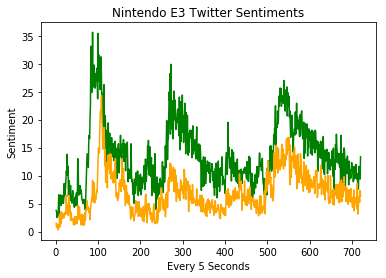

In [23]:
# plt.plot(five_sum_df['five_seconds'], five_sum_df['pos'], color='g')
# plt.plot(five_sum_df['five_seconds'], five_sum_df['neg'], color='orange')
# plt.xlabel('Every 5 Seconds')
# plt.ylabel('Sentiment')
# plt.title('Nintendo E3 Twitter Sentiments')
# plt.show()

#### Trend for mean of 5 seconds

In [24]:
# five_mean_df = df.groupby('five_seconds').mean()
# five_mean_df = five_mean_df.reset_index()
# five_mean_df.head()

,five_seconds,user.id,compound,neg,neu,pos
0,1,1.794026e+17,0.070175,0.027091,0.904400,0.068509
1,2,9.431412e+16,0.099768,0.012613,0.930774,0.056613
2,3,9.128063e+16,0.048535,0.020833,0.941318,0.037848
3,4,1.207539e+17,0.021063,0.018855,0.939226,0.041919
4,5,1.628430e+17,0.081242,0.004563,0.945031,0.050391


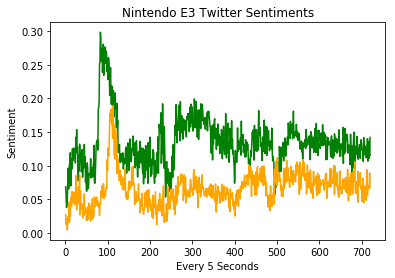

In [25]:
# plt.plot(five_mean_df['five_seconds'], five_mean_df['pos'], color='g')
# plt.plot(five_mean_df['five_seconds'], five_mean_df['neg'], color='orange')
# plt.xlabel('Every 5 Seconds')
# plt.ylabel('Sentiment')
# plt.title('Nintendo E3 Twitter Sentiments')
# plt.show()

# END Trend Lines

# Major Announcements

### Find Major Announcement Points & the Specific Words that Occured the Most
May end up not using and using only 5 second intervals instead... can label 5 second intervals as specific topics

In [26]:
#df.loc[df['five_seconds'] == 81] .head(3)

In [27]:
# mario_party = list(range(81,101))     #81 to 100
# smash_brothers = list(range(210,517)) #210 to 516
# end = list(range(517, 601))           #517 to 600
# #none for all others

# df['five_seconds'].max()

720

In [28]:
# all_five_seconds = list(range(1, 721))

In [29]:
# labels = []
# for i in all_five_seconds:
#     if i in mario_party:
#         labels.append('mario_party')
#     elif i in smash_brothers:
#         labels.append('smash_brothers')
#     elif i in end:
#         labels.append('end')
#     else:
#         labels.append('none')
# len(labels)

720

Dictionary that maps the labels to the appropriate 5 seconds.

In [30]:
#labels_dict = dict(zip(all_five_seconds, labels))

In [31]:
#df['.announcements.'] = df['five_seconds'].map(labels_dict)
#df.head()

,df_index,user.id,.text.,.lang.,created_at,timestamp_ms,.time.,text2,compound,neg,neu,pos,five_seconds,.announcements.
0,0,7.823009e+17,IT BEGINS!! #NintendoDirect,en,Tue Jun 12 16:00:24 +0000 2018,1528819224616,16:00:24,begin,0.0000,0.0,1.000,0.000,1,none
1,1,3.372678e+08,RT @funkemcfly: lord forgive me but i'm back o...,en,Tue Jun 12 16:00:24 +0000 2018,1528819224688,16:00:24,rt lord forgive im back smash 🅱️ros 🅱️ullshit,0.1406,0.0,0.900,0.100,1,none
2,2,3.187814e+08,The Nintendo presentation is starting!!! My bo...,en,Tue Jun 12 16:00:24 +0000 2018,1528819224632,16:00:24,nintendo presentation start body ready,0.5229,0.0,0.748,0.252,1,none
3,3,3.632452e+08,YO HERE WE GO #NintendoE3,en,Tue Jun 12 16:00:24 +0000 2018,1528819224782,16:00:24,yo go,0.0000,0.0,1.000,0.000,1,none
4,4,9.202859e+17,HERE WE GO #NintendoDirect #NintendoE3,en,Tue Jun 12 16:00:24 +0000 2018,1528819224819,16:00:24,go,0.0000,0.0,1.000,0.000,1,none


# END Major Announcements

##### Note: May not use... may instead create a radar plot for each SECOND and create a general label for all seconds in the hour.

# Word Dictionary

In [32]:
# df_words.head(3)

,df_index,user.id,.text.,.lang.,created_at,timestamp_ms,.time.,text2,compound,neg,...,sov,255,finland,duuudess,ny,podcast,blease,yeeeeeeesssss,embarass,freelance
0,0,7.823009e+17,IT BEGINS!! #NintendoDirect,en,Tue Jun 12 16:00:24 +0000 2018,1528819224616,16:00:24,begin,0.0000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.372678e+08,RT @funkemcfly: lord forgive me but i'm back o...,en,Tue Jun 12 16:00:24 +0000 2018,1528819224688,16:00:24,rt lord forgive im back smash 🅱️ros 🅱️ullshit,0.1406,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.187814e+08,The Nintendo presentation is starting!!! My bo...,en,Tue Jun 12 16:00:24 +0000 2018,1528819224632,16:00:24,nintendo presentation start body ready,0.5229,0.0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# df_words['five_seconds'] = df_words['.time.'].map(seconds_dict)
# df_words['.announcements.'] = df_words['five_seconds'].map(labels_dict)

# def create_dictionary_for_specified_time (time=1, which_five='top'): # choose either 'top' or 'bottom'
#     df_filtered_by_seconds = df_words.loc[(df_words['five_seconds']== time)]  #| (df_words['five_seconds']== 2)]
#     dict_by_seconds = df_filtered_by_seconds.to_dict(orient='index')
    
#     # create a cleaned dictionary for each word labeled by tweet number
#     list_of_word_dicts = []
#     for key1, val in dict_by_seconds.items():
#         u_words = val['text2'].split(' ')
#         neg = val['neg']
#         compound = val['compound']
#         neu = val['neu']
#         pos = val['pos']
#         for key, value in val.items():
#             try:
#                 value = float(value)
#                 if (value > 0) & (key in u_words) :
#                     list_of_word_dicts.append({ 
#                             'tweet_no': key1,
#                             key:{'count': 1, 'compound_sum': compound, 'neg_sum': neg, 
#                                  'neu_sum': neu, 'pos_sum': pos},
#                                                 })
#             except:
#                 pass
    
#     # remove duplicate words that appear several times in one tweet
#     no_dupl_list_of_word_dicts = [i for n, i in enumerate(list_of_word_dicts) 
#                                   if i not in list_of_word_dicts[n + 1:]]
    
#     return_dict = {}
#     for i in no_dupl_list_of_word_dicts:
#         for key, val in i.items():
#             if key is not 'tweet_no':
#                 if key not in return_dict.keys():
#                     return_dict.update({key : val})
#                 else:
#                     return_dict[key]['count'] += val['count']
#                     return_dict[key]['compound_sum'] += val['compound_sum']
#                     return_dict[key]['neg_sum'] += val['neg_sum']
#                     return_dict[key]['neu_sum'] += val['neu_sum']
#                     return_dict[key]['pos_sum'] += val['pos_sum']
                    
#     compound_dict = {}
#     for key, val in return_dict.items():
#         #print(key, val)
#         #compound_dict.update({key: val['compound_sum'] })
#         compound_dict[key] = val['compound_sum']
    
#     sorted_compound_dict = sorted(compound_dict.items(), key=lambda kv: kv[1])
    
#     if which_five == 'top':
#         #five_words = dict(sorted_compound_dict[0:5])
#         five_words = dict(sorted_compound_dict[-5:])
#     elif which_five == 'bottom': 
#         #five_words = dict(sorted_compound_dict[-5:])
#         five_words = dict(sorted_compound_dict[0:5])
#     else:
#         "Please choose either 'top' or 'bottom'."

#     return five_words

In [51]:
# testing = create_dictionary_for_specified_time(2)
# testing

{'rt': 1.1282,
 'direct': 1.169,
 'switch': 1.3931,
 'smash': 2.0819,
 'nintendo': 2.5028}

In [35]:
# bottom_df = pd.Series(testing[0])
# bottom_df = pd.DataFrame(bottom_df)
# bottom_df = bottom_df.T
# bottom_df['group'] = 'A'

# top_df = pd.Series(testing[1])
# top_df = pd.DataFrame(top_df)
# top_df = top_df.T
# top_df['group'] = 'A'

# END Word Dictionary

# Radar Plots

In [54]:
# #NOT WORKING YET
# def radar_plot_creator():
#     bottom_df = pd.Series(testing[0])
#     bottom_df = pd.DataFrame(bottom_df)
#     bottom_df = bottom_df.T
#     bottom_df['group'] = 'A'
#     top_df = pd.Series(testing[1])
#     top_df = pd.DataFrame(top_df)
#     top_df = top_df.T
#     top_df['group'] = 'A'
    
#    # Set data
#     radar_df_test = bottom_df

#     # number of variable
#     categories=list(radar_df_test)[1:]
#     N = len(categories)

#     # We are going to plot the first line of the data frame.
#     # But we need to repeat the first value to close the circular graph:
#     values=radar_df_test.loc[0].drop('group').values.flatten().tolist()
#     values += values[:1]
#     values

#     # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
#     angles = [n / float(N) * 2 * pi for n in range(N)]
#     angles += angles[:1]

#     # Initialise the spider plot
#     ax = plt.subplot(111, polar=True)

#     # Draw one axe per variable + add labels labels yet
#     plt.xticks(angles[:-1], categories, color='grey', size=8)

#     # Draw ylabels
#     ax.set_rlabel_position(0)
#     plt.yticks([-3,-2,-1,0,1,2,3], ["","","", 0, "", "", ""], color="grey", size=7)
#     plt.ylim(-3,3)

#     # Plot data
#     ax.plot(angles, values, linewidth=1, linestyle='solid')

#     # Fill area
#     testing_radar = ax.fill(angles, values, 'b', alpha=0.1);  
    
#     return testing_radar
# radar_plot_creator

<function __main__.radar_plot_creator()>

THIS ONE WORKS.... But not in a function:

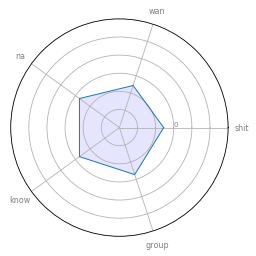

In [58]:
# # Set data
# radar_df_test = bottom_df
 
# # number of variable
# categories=list(radar_df_test)[1:]
# N = len(categories)
 
# # We are going to plot the first line of the data frame.
# # But we need to repeat the first value to close the circular graph:
# values=radar_df_test.loc[0].drop('group').values.flatten().tolist()
# values += values[:1]
# values
 
# # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# angles = [n / float(N) * 2 * pi for n in range(N)]
# angles += angles[:1]
 
# # Initialise the spider plot
# ax = plt.subplot(111, polar=True)
 
# # Draw one axe per variable + add labels labels yet
# plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# # Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([-3,-2,-1,0,1,2,3], ["","","", 0, "", "", ""], color="grey", size=7)
# plt.ylim(-3,3)
 
# # Plot data
# ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# # Fill area
# ax.fill(angles, values, 'b', alpha=0.1);


# END Radar Plots